# Climate Change in Delhi, India

In [ ]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date

In [ ]:
# load dataset
file_id = '1c4nA3GQV9zKUxPTprwtyb_8ESjI31oMB'
link='http://drive.google.com/uc?export=download&id={FILE_ID}'
csv_url=link.format(FILE_ID=file_id)

climate_df = pd.read_csv(csv_url)
climate_df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [ ]:
# check missing value
climate_df.isna().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [ ]:
# check data type
climate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [ ]:
# change date to datetime type variable
climate_df['date'] = climate_df['date'].astype('datetime64')

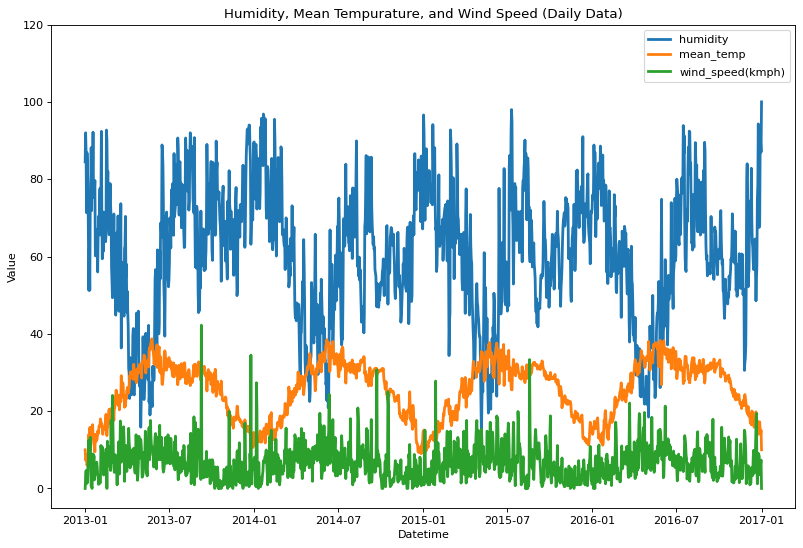

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8), dpi=80)
plt.plot(climate_df['date'],climate_df['humidity'],label='humidity',lw=2.5)
plt.plot(climate_df['date'],climate_df['meantemp'],label='mean_temp',lw=2.5)
plt.plot(climate_df['date'],climate_df['wind_speed'],label='wind_speed(kmph)',lw=2.5)
plt.title('Humidity, Mean Tempurature, and Wind Speed (Daily Data)')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.ylim(-5,120)
plt.legend()
# mean_temp has a clear pattern of change

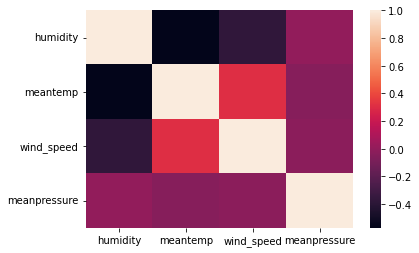

In [ ]:
# explore correlation
corr = climate_df[['humidity','meantemp','wind_speed','meanpressure']].corr()
sns.heatmap(corr)

In [ ]:
corr

,humidity,meantemp,wind_speed,meanpressure
humidity,1.000000,-0.571951,-0.373972,0.001734
meantemp,-0.571951,1.000000,0.306468,-0.038818
wind_speed,-0.373972,0.306468,1.000000,-0.020670
meanpressure,0.001734,-0.038818,-0.020670,1.000000


# Air Quality

In [ ]:
# load dataset
file_id = '1wwklnEdPc-zYXnfsxzvxZ93AFoQUtA6T'
link='http://drive.google.com/uc?export=download&id={FILE_ID}'
xlsx_url=link.format(FILE_ID=file_id)

air_df = pd.read_excel(xlsx_url)
air_df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.60,48.875001,0.757754
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.30,47.700000,0.725487
2,2004-03-10,20:00:00,2.2,1402.00,88,8.997817,939.25,131.0,1140.00,114.0,1554.50,1074.00,11.90,53.975000,0.750239
3,2004-03-10,21:00:00,2.2,1375.50,80,9.228796,948.25,172.0,1092.00,122.0,1583.75,1203.25,11.00,60.000000,0.786713
4,2004-03-10,22:00:00,1.6,1272.25,51,6.518224,835.50,131.0,1205.00,116.0,1490.00,1110.00,11.15,59.575001,0.788794


In [ ]:
# check missing value
air_df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [ ]:
# to datetime
air_df['Datetime']=air_df['Date'].astype(str)+" "+air_df['Time'].astype(str)
air_df['Datetime'] = air_df['Datetime'].astype('datetime64')

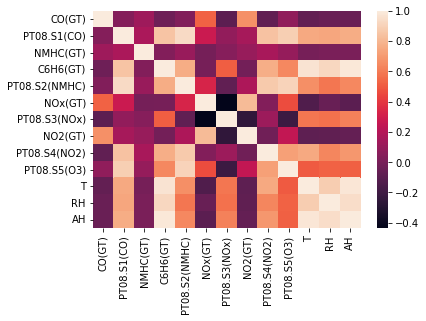

In [ ]:
# correlation plot
corr = air_df.drop(columns=['Date','Time']).corr()
sns.heatmap(corr)

In [ ]:
corr

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
CO(GT),1.000000,0.041415,0.128351,-0.031377,0.029939,0.526450,-0.089981,0.671140,-0.073721,0.080316,-0.068952,-0.048231,-0.045892
PT08.S1(CO),0.041415,1.000000,0.170009,0.852659,0.933101,0.278029,0.086931,0.154058,0.845133,0.892436,0.754806,0.745344,0.764866
NMHC(GT),0.128351,0.170009,1.000000,0.037329,0.110097,-0.004413,0.048832,0.103345,0.162689,0.101189,-0.000008,0.008288,0.012500
C6H6(GT),-0.031377,0.852659,0.037329,1.000000,0.767401,-0.001163,0.512154,-0.010971,0.774649,0.641306,0.971370,0.925068,0.984556
PT08.S2(NMHC),0.029939,0.933101,0.110097,0.767401,1.000000,0.331331,-0.073748,0.176569,0.874761,0.909909,0.668984,0.585775,0.646535
NOx(GT),0.526450,0.278029,-0.004413,-0.001163,0.331331,1.000000,-0.436083,0.817138,0.035580,0.461916,-0.138457,-0.053008,-0.095841
PT08.S3(NOx),-0.089981,0.086931,0.048832,0.512154,-0.073748,-0.436083,1.000000,-0.256217,0.122672,-0.208935,0.588061,0.573513,0.621576
NO2(GT),0.671140,0.154058,0.103345,-0.010971,0.176569,0.817138,-0.256217,1.000000,-0.022092,0.253469,-0.084084,-0.081300,-0.060423
PT08.S4(NO2),-0.073721,0.845133,0.162689,0.774649,0.874761,0.035580,0.122672,-0.022092,1.000000,0.723670,0.755053,0.640685,0.691889
PT08.S5(O3),0.080316,0.892436,0.101189,0.641306,0.909909,0.461916,-0.208935,0.253469,0.723670,1.000000,0.503659,0.524922,0.519432


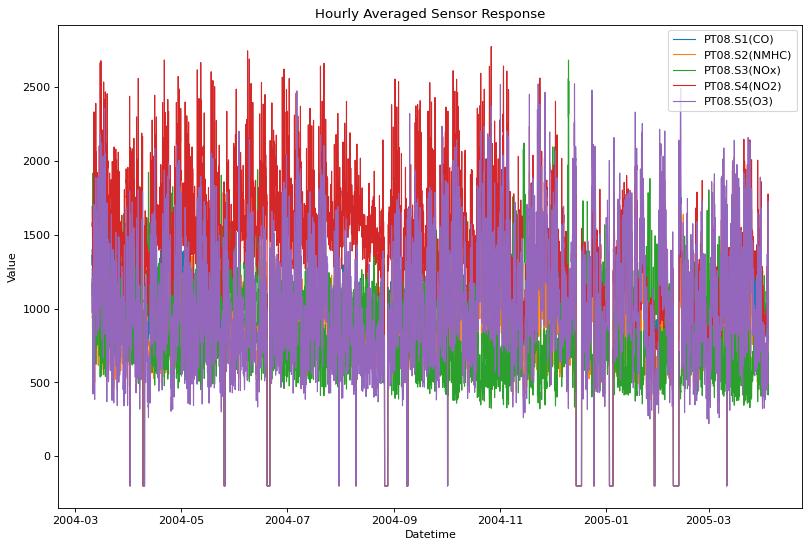

In [ ]:
# time series plot for hourly averaged sensor response
figure(figsize=(12, 8), dpi=80)
plt.plot(air_df['Datetime'],air_df['PT08.S1(CO)'],label='PT08.S1(CO)',lw=1)
plt.plot(air_df['Datetime'],air_df['PT08.S2(NMHC)'],label='PT08.S2(NMHC)',lw=1)
plt.plot(air_df['Datetime'],air_df['PT08.S3(NOx)'],label='PT08.S3(NOx)',lw=1)
plt.plot(air_df['Datetime'],air_df['PT08.S4(NO2)'],label='PT08.S4(NO2)',lw=1)
plt.plot(air_df['Datetime'],air_df['PT08.S5(O3)'],label='PT08.S5(O3)',lw=1)
plt.title('Hourly Averaged Sensor Response')
plt.xlabel('Datetime')
plt.ylabel('Value')
plt.legend()

# COVID-19

In [ ]:
! pip install covid19dh

In [ ]:
# load dataset
from covid19dh import covid19
df, src = covid19("USA", level = 1, start = date(2021,6,5),end=date(2022,3,31))

We have invested a lot of time and effort in creating COVID-19 Data Hub, please cite the following when using it:

	Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.

A BibTeX entry for LaTeX users is

	@Article{,
		title = {COVID-19 Data Hub},
		year = {2020},
		doi = {10.21105/joss.02376},
		author = {Emanuele Guidotti and David Ardia},
		journal = {Journal of Open Source Software},
		volume = {5},
		number = {51},
		pages = {2376},
	}

To hide this message use 'verbose = False'.


In [ ]:
# select numerical features
df = df[['id', 'date', 'confirmed', 'deaths', 'recovered', 'tests', 'vaccines',
       'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu']]

In [ ]:
# get daily cases and death
names = [name for name in list(df) if df.nunique()[name] > 1]
df_new = df[names]
n_row = df_new.shape[0]
daily_cases, daily_deaths = [0]*n_row, [0]*n_row
for row in range(1,n_row):
  daily_cases[row] = df_new.iloc[row, 1]- df_new.iloc[row-1, 1]
  daily_deaths[row] = df_new.iloc[row, 2]- df_new.iloc[row-1, 2]

In [ ]:
df_new.insert(1,"daily_cases", daily_cases, True)
df_new.insert(2,"daily_deaths", daily_deaths, True)

In [ ]:
df_new = df_new.drop(["confirmed", "deaths"], axis = 1)
df_new = df_new.iloc[1:,:]

In [ ]:
df_new.head()

,date,daily_cases,daily_deaths,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,icu
174082,2021-06-06,6153.0,252.0,456510316.0,319637615.0,175857924.0,150699503.0,15987.0,4677.0
174083,2021-06-07,19452.0,336.0,457155114.0,320709279.0,176231460.0,151440429.0,15742.0,4685.0
174084,2021-06-08,14185.0,375.0,458041145.0,321885577.0,176636591.0,152259712.0,15630.0,4608.0
174085,2021-06-09,20664.0,572.0,458908853.0,323052770.0,177028817.0,153083128.0,15266.0,4479.0
174086,2021-06-10,15799.0,460.0,459693845.0,324224255.0,177434448.0,153900333.0,14838.0,4383.0


In [ ]:
df_new.columns

Index(['date', 'daily_cases', 'daily_deaths', 'tests', 'vaccines',
       'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu'],
      dtype='object')

In [ ]:
df_new['date'] = df_new['date'].astype('datetime64')

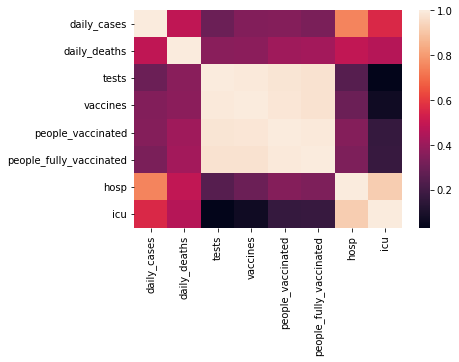

In [ ]:
# correlation plot
corr = df_new[['date', 'daily_cases', 'daily_deaths', 'tests', 'vaccines',
       'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu']].corr()
sns.heatmap(corr)

In [ ]:
corr

,daily_cases,daily_deaths,tests,vaccines,people_vaccinated,people_fully_vaccinated,hosp,icu
daily_cases,1.000000,0.487213,0.297865,0.350862,0.352673,0.332166,0.752793,0.557449
daily_deaths,0.487213,1.000000,0.365643,0.369813,0.414636,0.420702,0.489105,0.461840
tests,0.297865,0.365643,1.000000,0.994271,0.984090,0.973613,0.247789,0.029519
vaccines,0.350862,0.369813,0.994271,1.000000,0.987655,0.974163,0.297864,0.068115
people_vaccinated,0.352673,0.414636,0.984090,0.987655,1.000000,0.995679,0.353510,0.167872
people_fully_vaccinated,0.332166,0.420702,0.973613,0.974163,0.995679,1.000000,0.338740,0.173051
hosp,0.752793,0.489105,0.247789,0.297864,0.353510,0.338740,1.000000,0.922026
icu,0.557449,0.461840,0.029519,0.068115,0.167872,0.173051,0.922026,1.000000


Text(0.5, 1.0, 'U.S.A. Covid-19 Daily Cases')

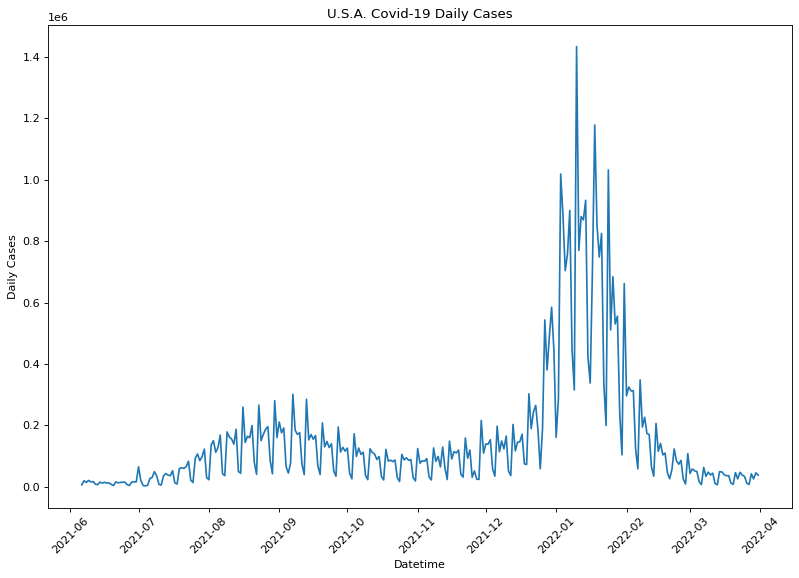

In [ ]:
# time series plot of Covid-19 daily cases
figure(figsize=(12, 8), dpi=80)
plt.plot(df_new['date'],df_new['daily_cases'])
plt.xticks(rotation=45)
plt.xlabel('Datetime')
plt.ylabel('Daily Cases')
plt.title('U.S.A. Covid-19 Daily Cases')